# Testing out the functionality of iPython Notebook and the BrainMap Util scripts

In [2]:
cd /Users/rsblumenfeld/gitrepos/brainmaptools/brainmaptools

/Users/rsblumenfeld/gitrepos/brainmaptools/brainmaptools


In [3]:
import pickle
import numpy as np
import networkx as nx
import pandas as pd
import operator
import brainmaptools as brainmap
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [4]:
#you might not have this package
import community

## Directories and files

In [5]:
txt="/Users/rsblumenfeld/work/meta-connect/data/Harvard-Oxford_results/Both_Hemispheres/regions.txt"
with open(txt) as f:
    workspaces = f.readlines()

datadir= "/Users/rsblumenfeld/work/meta-connect/data/Harvard-Oxford_results/Both_Hemispheres/"

files for domain filtering

In [6]:
domainsfile="/Users/rsblumenfeld/work/meta-connect/data/Behavioral_domains/studies_filtered_by_domain.pck"
domaindata=pickle.load(open(domainsfile, 'rb'))
domains=['Memory', 'Working Memory', 'Emotion', 'Attention', 'Language', 'Vision', 'Audition']

In [7]:
keycodes=brainmap.build_key_codes_from_workspaces(workspaces, datadir)

In [12]:
n_coactives=brainmap.build_n_coactives_array(keycodes)

In [15]:
costs=[.16, .18, .20, .22]

# In addition to n_coactives array do the following

this is new, it is the proper way to normalize the edges for coactivations (see Crossley et al 2013)

In [16]:
jaccard_matrix=brainmap.build_jaccard(keycodes)

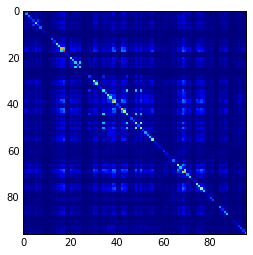

In [17]:
plt.imshow(n_coactives, interpolation='nearest')

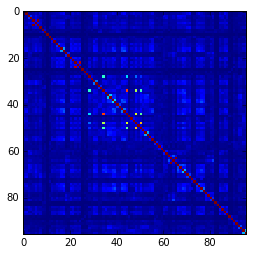

In [18]:
plt.imshow(jaccard_matrix, interpolation='nearest')

In [168]:
relabel_dict=brainmap.build_region_labels_dict(workspaces)

In [169]:
G=nx.from_numpy_matrix(jaccard_matrix)

In [170]:
G=nx.relabel_nodes(G,relabel_dict)

In [171]:
G.remove_edges_from(G.selfloop_edges())

# Apply cost to graph

In [172]:
Gcost=brainmap.applycost_to_g(G, .20)

remove non-connected components

In [173]:
metrics=brainmap.run_basic_metrics(G)

In [174]:
weighted_metrics=brainmap.run_weighted_metrics(G)

In [175]:
weighted_metrics['topbetween_cent']

['MiddleFrontalGyrus_R',
 'CentralOpercularCortex_L',
 'SupramarginalGyrusposteriordivision_L',
 'SuperiorParietalLobule_R',
 'SuperiorParietalLobule_L']

In [176]:
nx.betweenness_centrality(G)

{'AngularGyrus_L': 0.0003299386991384447,
 'AngularGyrus_R_edit.nii': 0.00040614319363010867,
 'CentralOpercularCortex_L': 0.0005311478030723667,
 'CentralOpercularCortex_R': 0.0003381019631785154,
 'CingulateGyrusanteriordivision_L': 0.0002491879123908198,
 'CingulateGyrusanteriordivision_R': 0.0005311478030723667,
 'CingulateGyrusposteriordivision_L': 0.0002491879123908198,
 'CingulateGyrusposteriordivision_R': 0.0004631065726207734,
 'CunealCortex_L': 0.00035082244833431714,
 'CunealCortex_R': 0.00020067433517391065,
 'FrontalMedialCortex_L': 4.869361514233819e-06,
 'FrontalMedialCortex_R': 0.00017549080177228988,
 'FrontalOperculumCortex_L': 0.0004476663055332614,
 'FrontalOperculumCortex_R': 0.0001903545110121562,
 'FrontalOrbitalCortex_L': 0.00040614319363010867,
 'FrontalOrbitalCortex_R': 0.0004631065726207734,
 'FrontalPole_L': 0.0005311478030723667,
 'FrontalPole_R': 0.0005311478030723667,
 'HeschlsGyrusincludesH1andH2_L': 0.0001537164928912144,
 'HeschlsGyrusincludesH1andH2_R

In [17]:
metrics['topbetween_cent']

['MiddleFrontalGyrus_R',
 'CentralOpercularCortex_L',
 'SupramarginalGyrusposteriordivision_L',
 'SuperiorParietalLobule_R',
 'SuperiorParietalLobule_L']

In [18]:
metrics['topdegree_cent']

['MiddleFrontalGyrus_R',
 'CentralOpercularCortex_L',
 'SupramarginalGyrusposteriordivision_L',
 'SuperiorParietalLobule_R',
 'SuperiorParietalLobule_L']

In [19]:
metrics['topdegrees']

['MiddleFrontalGyrus_R',
 'CentralOpercularCortex_L',
 'SupramarginalGyrusposteriordivision_L',
 'SuperiorParietalLobule_R',
 'SuperiorParietalLobule_L']

In [20]:
metrics['cpl']

[1.032017543859649]

In [21]:
metrics['topccoeff']

['TemporalFusiformCortexanteriordivision_L',
 'InferiorTemporalGyrusanteriordivision_R',
 'SupracalcarineCortex_R',
 'TemporalFusiformCortexanteriordivision_R',
 'FrontalMedialCortex_L']

In [22]:
best_part=community.best_partition(G)

In [24]:
community.modularity(best_part, G)

0.13005320894965408

## Domain filter

In [177]:
#domains=['Memory', 'Working Memory', 'Emotion', 'Attention', 'Language', 'Vision', 'Audition']
keycodes_domain= {domain: brainmap.domain_filter_keycodes(keycodes, domaindata, domain) for domain in domains}
n_coactives_domain={ d_keys: brainmap.build_n_coactives_array(keycodes_domain[d_keys]) for d_keys in domains}
jaccard_domain={ d_keys: brainmap.build_jaccard(n_coactives_domain[d_keys]) for d_keys in domains}

for d_keys in domains:
    G_domain[d_keys]=nx.from_numpy_matrix(jaccard_domain[d_keys])
    G_domain[d_keys]=nx.relabel_nodes(G_domain[d_keys],relabel_dict)
    G_domain[d_keys].remove_edges_from(G_domain[d_keys].selfloop_edges())

In [178]:
domain_r_mat=np.zeros([len(domains),len(domains)])
for x,y in enumerate(jaccard_domain):
    row=np.concatenate(np.triu(jaccard_domain[y]))
    for a,b in enumerate(jaccard_domain):
        column=np.concatenate(np.triu(jaccard_domain[b]))
        domain_r_mat[x,a]=stats.pearsonr(row,column)[0]

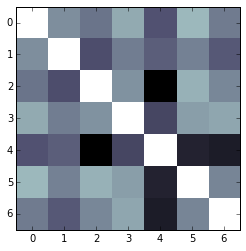

In [179]:
plt.imshow(domain_r_mat, interpolation='nearest', cmap='bone')

In [184]:
G_domain_cost={}
for d_keys in domains:
    G_domain_cost[d_keys]={}
    for cost in costs:
        G_domain_cost[d_keys][cost]=brainmap.applycost_to_g(G_domain[d_keys], cost)
        
    

In [185]:
for d_keys in domains:
    G_domain_cost[d_keys][.2].neighbors('InferiorFrontalGyrusparstriangularis_L_edit')

In [188]:
metrics=brainmap.run_basic_metrics(G_domain_cost['Memory'][.2])

In [189]:
metrics['topbetween_cent']

['LateralOccipitalCortexinferiordivision_R',
 'InferiorTemporalGyrusposteriordivision_L',
 'FrontalOperculumCortex_L',
 'MiddleTemporalGyrusanteriordivision_R',
 'SuperiorTemporalGyrusanteriordivision_R']

In [187]:
nx.betweenness_centrality(G_domain_cost['Memory'][.2])

{'AngularGyrus_L': 0.005457803484339236,
 'AngularGyrus_R_edit.nii': 0.000537515626556658,
 'CentralOpercularCortex_L': 0.012823663502948878,
 'CentralOpercularCortex_R': 0.006680144114577108,
 'CingulateGyrusanteriordivision_L': 0.019010779917144484,
 'CingulateGyrusanteriordivision_R': 0.0032752100133154214,
 'CingulateGyrusposteriordivision_L': 0.019010779917144484,
 'CingulateGyrusposteriordivision_R': 0.023235574581081223,
 'CunealCortex_L': 0.024985657259417843,
 'CunealCortex_R': 0.03242451609401397,
 'FrontalMedialCortex_L': 4.479283314669653e-05,
 'FrontalMedialCortex_R': 0.004315467000092083,
 'FrontalOperculumCortex_L': 0.03860095662817528,
 'FrontalOperculumCortex_R': 0.011010445730086187,
 'FrontalOrbitalCortex_L': 0.0012460478609447726,
 'FrontalOrbitalCortex_R': 0.0,
 'FrontalPole_L': 0.0,
 'FrontalPole_R': 0.0,
 'HeschlsGyrusincludesH1andH2_L': 0.005030035872414674,
 'HeschlsGyrusincludesH1andH2_R': 0.0,
 'InferiorFrontalGyrusparsopercularis_L': 3.732736095558044e-05,
 